### 读取csv文件，生成dataframe格式数据 

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# 创建SparkSession连接到Spark集群-SparkSession.builder.appName('name').getOrCreate()
spark = SparkSession \
    .builder \
    .appName('create_df_YearsFlights') \
    .getOrCreate()

air = spark.read.csv('airdelay_small.csv', header=True, inferSchema=True)


In [4]:
air

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: string, CRSDepTime: int, ArrTime: string, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: string, TaxiIn: string, TaxiOut: string, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

#### 发现有一些时间数据是字符串格式的，后期注意要改成数值型

### 用rdd算聚类标签 

#### 1） 机场起飞到达航班总数 

In [6]:
rdd = air.rdd

In [7]:
rdd.first()

Row(Year=2006, Month=7, DayofMonth=6, DayOfWeek=4, DepTime='2055', CRSDepTime=2055, ArrTime='2150', CRSArrTime=2148, UniqueCarrier='XE', FlightNum=2619, TailNum='N11526', ActualElapsedTime='55', CRSElapsedTime='53', AirTime='25', ArrDelay='2', DepDelay='0', Origin='IAH', Dest='LCH', Distance='127', TaxiIn='8', TaxiOut='22', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='0', WeatherDelay='0', NASDelay='0', SecurityDelay='0', LateAircraftDelay='0')

In [8]:
OriCount = rdd.map(lambda x:(x.Origin,1)).reduceByKey(lambda x,y:x+y)

In [9]:
OriCount.count()

336

In [67]:
OriCount.collect()

[('DFW', 257763),
 ('SLC', 88748),
 ('OAK', 52255),
 ('OMA', 18145),
 ('BUF', 22116),
 ('RDU', 46963),
 ('MEM', 53585),
 ('BUR', 26227),
 ('BDL', 29393),
 ('ONT', 35529),
 ('PBI', 23866),
 ('PHL', 97841),
 ('DLH', 1501),
 ('ICT', 9312),
 ('SIT', 1325),
 ('MFE', 3088),
 ('BGR', 2401),
 ('GFK', 1089),
 ('ALB', 13434),
 ('SBA', 5110),
 ('IDA', 1553),
 ('HTS', 884),
 ('CAE', 7471),
 ('TOL', 2754),
 ('FNT', 2242),
 ('GTF', 2703),
 ('CRW', 2734),
 ('STX', 1292),
 ('LAN', 3056),
 ('AVP', 2197),
 ('OAJ', 544),
 ('FLG', 780),
 ('HSV', 7106),
 ('SBP', 1629),
 ('MFR', 2324),
 ('WRG', 704),
 ('BIL', 4147),
 ('MEI', 257),
 ('TWF', 504),
 ('TVL', 166),
 ('CPR', 1151),
 ('CMI', 1241),
 ('GUM', 729),
 ('SCC', 546),
 ('CSG', 867),
 ('TXK', 500),
 ('SPI', 248),
 ('CIC', 276),
 ('VLD', 296),
 ('OXR', 409),
 ('EFD', 168),
 ('LCH', 367),
 ('BPT', 383),
 ('BQK', 286),
 ('ISO', 282),
 ('MQT', 231),
 ('EYW', 763),
 ('DLG', 242),
 ('DRO', 778),
 ('PSE', 110),
 ('ALO', 55),
 ('ROR', 99),
 ('GST', 87),
 ('WYS', 

In [12]:
DesCount = rdd.map(lambda x:(x.Dest,1)).reduceByKey(lambda x,y:x+y)

In [13]:
DesCount.count()

334

In [66]:
DesCount.collect()

[('LCH', 332),
 ('SLC', 88883),
 ('PHL', 98354),
 ('OAK', 51912),
 ('BDL', 29497),
 ('DFW', 260538),
 ('PBI', 23845),
 ('BUF', 21856),
 ('ONT', 34940),
 ('OMA', 17868),
 ('MEM', 53953),
 ('FLG', 713),
 ('SPI', 240),
 ('BUR', 26167),
 ('SBA', 5098),
 ('HSV', 6942),
 ('RDU', 46728),
 ('LAN', 3002),
 ('TOL', 2646),
 ('MFE', 3048),
 ('BPT', 385),
 ('DLH', 1488),
 ('STX', 1233),
 ('CSG', 791),
 ('BIL', 4102),
 ('CIC', 315),
 ('ICT', 9142),
 ('DRO', 733),
 ('CAE', 7405),
 ('MFR', 2364),
 ('AVP', 2048),
 ('SIT', 1335),
 ('ALB', 13226),
 ('OAJ', 489),
 ('BGR', 2505),
 ('SCC', 527),
 ('TWF', 490),
 ('OXR', 392),
 ('GUM', 812),
 ('CPR', 1160),
 ('CRW', 2764),
 ('HTS', 812),
 ('GFK', 1093),
 ('EFD', 147),
 ('FNT', 2267),
 ('IDA', 1498),
 ('SBP', 1718),
 ('CMI', 1139),
 ('ISO', 267),
 ('GTF', 2826),
 ('PSE', 101),
 ('TXK', 507),
 ('BQK', 266),
 ('WRG', 713),
 ('ROR', 126),
 ('EYW', 795),
 ('TVL', 142),
 ('VLD', 313),
 ('WYS', 76),
 ('MEI', 281),
 ('MQT', 230),
 ('DLG', 227),
 ('MIB', 5),
 ('GST', 

#### 2)到达延迟15分钟的比例 

In [40]:
#算出到达延迟15分钟的数量
Des15 = rdd.filter(lambda x:x.ArrDelay != 'NA').map(lambda x:(x.Dest,int(x.ArrDelay))).filter(lambda x:x[1]>15)

In [41]:
Des15.count()

1043448

In [42]:
Des15_c = Des15.map(lambda x:(x[0],1)).reduceByKey(lambda x,y:x+y).persist()

In [43]:
Des15_c.count()

329

In [44]:
Des15_c.first()

('SLC', 14270)

In [65]:
Des15_c.collect()

[('SLC', 14270),
 ('BDL', 5491),
 ('DFW', 42603),
 ('PBI', 5344),
 ('FLG', 91),
 ('PHL', 21335),
 ('BPT', 40),
 ('OAK', 8589),
 ('ONT', 5917),
 ('ICT', 1664),
 ('DRO', 115),
 ('MEM', 7680),
 ('SIT', 283),
 ('ALB', 2670),
 ('CAE', 1535),
 ('BGR', 565),
 ('LAN', 544),
 ('OMA', 3536),
 ('RDU', 7890),
 ('HSV', 1179),
 ('SBA', 814),
 ('GUM', 88),
 ('CPR', 150),
 ('BUF', 4552),
 ('GFK', 164),
 ('CSG', 179),
 ('BUR', 4138),
 ('MFR', 493),
 ('BIL', 719),
 ('IDA', 216),
 ('HTS', 118),
 ('CRW', 529),
 ('ISO', 49),
 ('SBP', 236),
 ('STX', 221),
 ('MFE', 500),
 ('EYW', 165),
 ('TOL', 536),
 ('WYS', 14),
 ('AVP', 417),
 ('GTF', 401),
 ('TWF', 71),
 ('CMI', 306),
 ('FNT', 532),
 ('MEI', 76),
 ('LCH', 57),
 ('DLH', 200),
 ('WRG', 173),
 ('BQK', 65),
 ('ROR', 20),
 ('GST', 20),
 ('DLG', 44),
 ('OAJ', 87),
 ('SCC', 93),
 ('TXK', 70),
 ('OXR', 45),
 ('EFD', 16),
 ('VLD', 85),
 ('TVL', 17),
 ('CIC', 62),
 ('MQT', 80),
 ('PSE', 26),
 ('SPI', 48),
 ('ALO', 8),
 ('INL', 2),
 ('CHO', 149),
 ('ABQ', 5883),
 (

####  3)出发延迟15分钟的比例

In [45]:
#算出出发延迟15分钟的数量
Ori15 = rdd.filter(lambda x:x.DepDelay != 'NA').map(lambda x:(x.Origin,int(x.DepDelay))).filter(lambda x:x[1]>15)

In [47]:
Ori15_c = Ori15.map(lambda x:(x[0],1)).reduceByKey(lambda x,y:x+y).persist()

In [48]:
Ori15_c.count()

331

In [49]:
Ori15_c.first()

('DFW', 41349)

In [64]:
Ori15_c.collect()

[('DFW', 41349),
 ('OMA', 2229),
 ('ONT', 4196),
 ('PHL', 18116),
 ('BGR', 288),
 ('SLC', 11191),
 ('ALB', 1724),
 ('RDU', 6121),
 ('MEM', 6704),
 ('OAK', 7626),
 ('HTS', 79),
 ('BUF', 2919),
 ('FNT', 306),
 ('CRW', 337),
 ('MFE', 286),
 ('PBI', 3266),
 ('ICT', 936),
 ('GTF', 176),
 ('BDL', 3363),
 ('TOL', 313),
 ('TVL', 13),
 ('CAE', 1036),
 ('BUR', 3410),
 ('CMI', 146),
 ('HSV', 713),
 ('LAN', 293),
 ('SBA', 673),
 ('CSG', 104),
 ('CIC', 43),
 ('MFR', 411),
 ('VLD', 50),
 ('SCC', 65),
 ('SBP', 199),
 ('EYW', 129),
 ('OAJ', 56),
 ('AVP', 213),
 ('BQK', 62),
 ('DRO', 101),
 ('STX', 143),
 ('DLH', 142),
 ('ROR', 20),
 ('GFK', 65),
 ('BIL', 373),
 ('CPR', 131),
 ('MEI', 55),
 ('DLG', 57),
 ('SIT', 207),
 ('IDA', 117),
 ('GUM', 75),
 ('BPT', 24),
 ('TWF', 54),
 ('TXK', 42),
 ('WRG', 139),
 ('PSE', 16),
 ('ISO', 23),
 ('WYS', 7),
 ('FLG', 51),
 ('SPI', 43),
 ('MQT', 32),
 ('GST', 14),
 ('OXR', 22),
 ('LCH', 34),
 ('EFD', 9),
 ('INL', 1),
 ('ALO', 1),
 ('MIB', 2),
 ('RDR', 1),
 ('BJI', 1),


#### 4)取消航班的比例 

In [50]:
#算出（作为起飞站）取消航班的数量
Ori_cancel= rdd.filter(lambda x:x.Cancelled==1)

In [51]:
Ori_cancel.count()

103106

In [52]:
Ori_cancel.first()

Row(Year=2001, Month=9, DayofMonth=13, DayOfWeek=4, DepTime='NA', CRSDepTime=1124, ArrTime='NA', CRSArrTime=1622, UniqueCarrier='AA', FlightNum=812, TailNum='NKNO', ActualElapsedTime='NA', CRSElapsedTime='178', AirTime='NA', ArrDelay='NA', DepDelay='NA', Origin='SAN', Dest='DFW', Distance='1171', TaxiIn='0', TaxiOut='0', Cancelled=1, CancellationCode='NA', Diverted=0, CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA')

In [53]:
Ori_can_airport = Ori_cancel.map(lambda x:(x.Origin,1)).reduceByKey(lambda x,y:x+y).persist()

In [54]:
Ori_can_airport.count()

317

In [55]:
Ori_can_airport.collect()

[('BUR', 354),
 ('SLC', 938),
 ('RDU', 818),
 ('DFW', 4499),
 ('PHL', 2548),
 ('FLG', 30),
 ('ALB', 249),
 ('BUF', 500),
 ('MEM', 862),
 ('ICT', 206),
 ('HSV', 165),
 ('ONT', 430),
 ('BIL', 46),
 ('OAK', 587),
 ('BDL', 509),
 ('DLG', 7),
 ('IDA', 23),
 ('SIT', 22),
 ('FNT', 56),
 ('MFR', 37),
 ('PBI', 279),
 ('CAE', 186),
 ('STX', 19),
 ('EYW', 16),
 ('OMA', 216),
 ('BGR', 79),
 ('MQT', 14),
 ('TOL', 88),
 ('SBA', 114),
 ('CRW', 77),
 ('AVP', 68),
 ('CSG', 35),
 ('CMI', 54),
 ('LCH', 12),
 ('LAN', 95),
 ('BPT', 10),
 ('GTF', 52),
 ('GFK', 25),
 ('DLH', 46),
 ('GUM', 20),
 ('SBP', 32),
 ('MFE', 37),
 ('TWF', 13),
 ('INL', 2),
 ('WRG', 30),
 ('CPR', 20),
 ('OXR', 11),
 ('TVL', 11),
 ('DRO', 16),
 ('HTS', 26),
 ('TXK', 17),
 ('SCC', 33),
 ('OAJ', 9),
 ('BQK', 11),
 ('SPI', 15),
 ('EFD', 4),
 ('CIC', 4),
 ('MEI', 11),
 ('VLD', 9),
 ('ISO', 9),
 ('ALO', 4),
 ('GST', 2),
 ('WYS', 2),
 ('ROR', 4),
 ('PSE', 1),
 ('SAN', 914),
 ('DCA', 2677),
 ('XNA', 136),
 ('SYR', 316),
 ('MDW', 831),
 ('MIA'

#### ***最后需要的是比例，所以合并后要除以总数 

#### 4）该机场（作为起始站的）所有航线平均距离

In [57]:
#一条航线的航班号，距离，起飞机场是一样的，用这三个字段去个重
dis0 = rdd.map(lambda x:(x.FlightNum,x.Distance,x.Origin)).distinct().persist()

In [58]:
dis0.first()

(2619, '127', 'IAH')

In [59]:
dis0.count()

500008

In [62]:
dis1 = dis0.filter(lambda x:x[1]!='NA').map(lambda x:(x[2],int(x[1]))).reduceByKey(lambda x,y:(x+y)/2)

In [ ]:
dis1.count()

In [63]:
dis1.collect()

[('DFW', 827.3670822476917),
 ('BUF', 330.9605319694118),
 ('RDU', 385.498486089543),
 ('PBI', 720.2943459279782),
 ('DLH', 144.00013857195577),
 ('ICT', 569.3591167325819),
 ('PHL', 386.08419631771307),
 ('OAK', 651.4840038585489),
 ('SLC', 1026.299344229681),
 ('OMA', 498.27822029184335),
 ('MEM', 564.4890700808147),
 ('ALB', 512.8286709213403),
 ('MFE', 370.2091129658945),
 ('AVP', 310.48877194219745),
 ('ONT', 480.74805710776087),
 ('BDL', 752.3168991471516),
 ('CAE', 227.38187482975624),
 ('FLG', 118.162353515625),
 ('CRW', 333.2737043672911),
 ('FNT', 190.16849196899346),
 ('BUR', 539.0541006762153),
 ('MFR', 309.03266345397793),
 ('HSV', 381.72460049799207),
 ('HTS', 165.37101986581547),
 ('CPR', 260.356897354126),
 ('STX', 952.409217953682),
 ('GTF', 379.79308019594646),
 ('CSG', 83.0),
 ('BGR', 374.1381489561584),
 ('GUM', 323.283935546875),
 ('SBA', 578.3974011156201),
 ('BIL', 479.1351021631912),
 ('TOL', 245.9681057045059),
 ('LAN', 169.36196304003823),
 ('SBP', 200.5305514

###  把以上得到的合并（多表一起合并内存不够，分了几次合的）

In [118]:
test = OriCount.fullOuterJoin(DesCount)#.join(Ori15_c).fullOuterJoin(Des15_c)#.join(Ori_can_airport).join(dis1)
#都一起join内存不够

In [121]:
test1=Ori15_c.join(Des15_c)

In [136]:
test2 = test.join(test1).persist()

In [139]:
test3 = test2.join(Ori_can_airport).persist()

In [144]:
test4 = test3.join(dis1).persist()

In [141]:
test4.first()

('DFW', ((((257763, 260538), (41349, 42603)), 4499), 827.3670822476917))

In [145]:
test4.count()

316

In [146]:
res = test4.map(lambda x:(x[0],x[1][0][0][0][0],x[1][0][0][0][1],x[1][0][0][1][0],x[1][0][0][1][1],x[1][0][1],x[1][1])).persist()

In [148]:
#机场，起飞总数，到达总数，起飞延超15航班数，到达延超15航班数，起飞取消数，航线距离
res.first()

('DFW', 257763, 260538, 41349, 42603, 4499, 827.3670822476917)

In [149]:
res.count()

316

In [195]:
### 算比例
#机场，起飞总数和到达总数之和，起飞超15分钟比例，到达超15分钟比例，起飞取消比例，航线距离
result = res.map(lambda x:(x[0],x[1]+x[2],x[3]/x[1],x[4]/x[2],x[5]/x[1],x[6])).persist()

In [200]:
result.count()

316

In [216]:
result.collect()

[('DFW',
  518301,
  0.16041479964153119,
  0.16351933307233493,
  0.01745401783809158,
  827.3670822476917),
 ('SLC',
  177631,
  0.12609861630684635,
  0.1605481363140308,
  0.010569252264839771,
  1026.299344229681),
 ('OAK',
  104167,
  0.14593818773323128,
  0.16545307443365695,
  0.011233374796670175,
  651.4840038585489),
 ('OMA',
  36013,
  0.12284375861118765,
  0.19789567942690844,
  0.011904105814273905,
  498.27822029184335),
 ('BUF',
  43972,
  0.13198589256646773,
  0.20827232796486092,
  0.022608066558147948,
  330.9605319694118),
 ('RDU',
  93691,
  0.13033664799948896,
  0.16884951206985105,
  0.017417967335987904,
  385.498486089543),
 ('MEM',
  107538,
  0.12510963889148083,
  0.14234611606398162,
  0.016086591396846133,
  564.4890700808147),
 ('BUR',
  52394,
  0.13001868303656536,
  0.15813811289028165,
  0.01349754070232966,
  539.0541006762153),
 ('BDL',
  58890,
  0.11441499676793794,
  0.18615452418890058,
  0.017317048276800598,
  752.3168991471516),
 ('ONT',


### k均值聚类 

In [169]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.sql.types import *
from  pyspark.sql import SQLContext
sqlContext = SQLContext(spark)

In [204]:
julei_schema = StructType([  
                           StructField('airport', StringType(),True), 
                           StructField('orides_c', IntegerType(),True), 
                           StructField('ori15_p', FloatType(),True),
                           StructField('des15_p', FloatType(),True),
                           StructField('ori_can_p', FloatType(),True),
                           StructField('distance', FloatType(),True)
                          ])
julei_df = sqlContext.createDataFrame(result,julei_schema)

In [218]:
#导出
pandas_df = julei_df.toPandas()

In [219]:
pandas_df.to_csv("julei.csv")

In [205]:
julei_df.show()

+-------+--------+-----------+----------+------------+---------+
|airport|orides_c|    ori15_p|   des15_p|   ori_can_p| distance|
+-------+--------+-----------+----------+------------+---------+
|    DFW|  518301|  0.1604148|0.16351934| 0.017454017|827.36707|
|    SLC|  177631| 0.12609862|0.16054814| 0.010569252|1026.2993|
|    OAK|  104167| 0.14593819|0.16545308|0.0112333745|  651.484|
|    OMA|   36013| 0.12284376|0.19789568| 0.011904106|498.27823|
|    BUF|   43972| 0.13198589|0.20827232| 0.022608066|330.96054|
|    RDU|   93691| 0.13033664|0.16884951| 0.017417967|385.49847|
|    MEM|  107538| 0.12510964|0.14234611| 0.016086591| 564.4891|
|    BUR|   52394| 0.13001868|0.15813811| 0.013497541| 539.0541|
|    BDL|   58890|   0.114415|0.18615453|  0.01731705| 752.3169|
|    ONT|   70469|  0.1181007|0.16934745| 0.012102789|480.74805|
|    PBI|   47711| 0.13684739|0.22411408| 0.011690271| 720.2944|
|    PHL|  196195| 0.18515755|0.21692051| 0.026042253| 386.0842|
|    DLH|    2989|  0.094

In [206]:
julei_features = julei_df.columns[1:]

In [207]:
#选取特征项，将特征项合并成向量
from pyspark.ml.feature import VectorAssembler
vecAss = VectorAssembler(inputCols = julei_features, outputCol = 'features')
df_km = vecAss.transform(julei_df).select('airport', 'features')


In [208]:
df_km.show(3)

+-------+--------------------+
|airport|            features|
+-------+--------------------+
|    DFW|[518301.0,0.16041...|
|    SLC|[177631.0,0.12609...|
|    OAK|[104167.0,0.14593...|
+-------+--------------------+
only showing top 3 rows



Text(0, 0.5, 'cost')

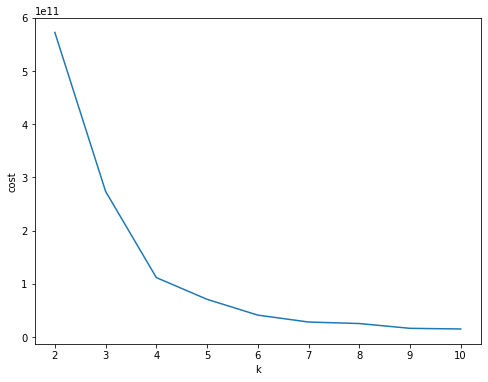

In [209]:
#算cost看要分成几类
from pyspark.ml.clustering import KMeans
cost = list(range(2,11))
for k in range(2, 11):
    kmeans = KMeans(k=k, seed=1)
    km_model = kmeans.fit(df_km)
    # computeCost:计算输入点与其对应的聚类中心之间的平方距离之和。
    cost[k-2] = km_model.computeCost(df_km)

# 可视化
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(range(2,11), cost)
ax.set_xlabel('k')
ax.set_ylabel('cost')


####  分成4的时候拐点较明显，K定为4

In [210]:
### 
kmeans = KMeans(k=4, seed=1)
km_model = kmeans.fit(df_km)
centers = km_model.clusterCenters()

In [211]:
#查看聚类中心，画个图描述四类的不同
centers

[array([8.02884586e+03, 1.22163415e-01, 1.83800190e-01, 2.91491914e-02,
        3.70265394e+02]),
 array([1.10628156e+05, 1.36752183e-01, 1.79003613e-01, 1.49506314e-02,
        7.03624872e+02]),
 array([5.51640667e+05, 1.78423539e-01, 1.95890178e-01, 2.17729788e-02,
        6.46970622e+02]),
 array([2.51079200e+05, 1.60224874e-01, 1.93120033e-01, 2.05145465e-02,
        7.06545683e+02])]

In [221]:
haha = pd.DataFrame(centers)

In [222]:
haha

,0,1,2,3,4
0,8028.845865,0.122163,0.183800,0.029149,370.265394
1,110628.156250,0.136752,0.179004,0.014951,703.624872
2,551640.666667,0.178424,0.195890,0.021773,646.970622
3,251079.200000,0.160225,0.193120,0.020515,706.545683


In [223]:
sasa = haha.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))

In [224]:
sasa

,0,1,2,3,4
0,0.000000,0.000000,0.284047,1.000000,0.000000
1,0.188736,0.259309,0.000000,0.000000,0.991314
2,1.000000,1.000000,1.000000,0.480496,0.822841
3,0.447103,0.676526,0.835956,0.391865,1.000000


In [212]:
# 获取聚类预测结果
transformed = km_model.transform(df_km).select('airport', 'prediction')


In [213]:
# 合并表格
df_pred = julei_df.join(transformed, 'airport')

In [214]:
transformed.show(10)#查看前十个分类情况

+-------+----------+
|airport|prediction|
+-------+----------+
|    DFW|         2|
|    SLC|         1|
|    OAK|         1|
|    OMA|         0|
|    BUF|         0|
|    RDU|         1|
|    MEM|         1|
|    BUR|         0|
|    BDL|         0|
|    ONT|         1|
+-------+----------+
only showing top 10 rows



In [215]:
df_pred.show(10)

+-------+--------+-----------+----------+-----------+---------+----------+
|airport|orides_c|    ori15_p|   des15_p|  ori_can_p| distance|prediction|
+-------+--------+-----------+----------+-----------+---------+----------+
|    BGM|    2534|0.086234175|0.16692914| 0.03243671|272.56326|         0|
|    DLG|     469| 0.23553719| 0.1938326| 0.02892562| 249.3125|         0|
|    INL|      22| 0.07692308|0.22222222| 0.15384616|    254.0|         0|
|    PSE|     211| 0.14545454|0.25742576|0.009090909| 1437.625|         0|
|    MSY|   87587|0.121338055|0.18345816|0.012855349|  575.888|         1|
|    GEG|   23646| 0.11734781|0.18857577|0.009665932|898.63055|         0|
|    BUR|   52394| 0.13001868|0.15813811|0.013497541| 539.0541|         0|
|    SNA|   73761| 0.12284739|0.16256212|0.016489765| 1251.249|         1|
|    GRB|    7478| 0.10571971|0.18237002|0.037408512|275.19647|         0|
|    GTF|    5529| 0.06511284|0.14189668|0.019237883| 379.7931|         0|
+-------+--------+-------